# Problem 3: Regression
For this problem, you need to use the built-in sklearn California Housing dataset. You can load this data using
-- from sklearn.datasets import fetch_california_housing
-- cal_housing = fetch_california_housing()

Divide the data into training and test sets using train_test_split and random_state=38

The goal is to experiment with few regression algorithms and compare their performance on this data.
1. Build and train a LASSO Regression model. Vary the constraint parameter α and analyze the results by identifying cases of overfitting and underfitting. Select the optimal value of α and justify your choice.
2. Build and train a Decision Tree regression model. Vary the pruning parameter and analyze the results by identifying cases of overfitting and underfitting. Select the optimal pruning and justify your choice.
3. Compare the accuracy of the 2 methods and the relevant features identified by each method and comment on the results.

import libraries

In [92]:
import operator

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas
import pandas as pd
import sklearn_evaluation
import sns as sns
from numpy import random
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

random.seed(38)
np.random.seed(38)

import data

In [255]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(
    cal_housing['data'],
    cal_housing['target'],
    random_state=38,
)

print(len(X_train))
print(len(X_test))

15480
5160


## LASSO

In [213]:

def grid_search_lasso(alphas):
    lasso_reg = Lasso(random_state=38)
    hyperparameters = {'alpha': alphas}
    grid_search = GridSearchCV(
        lasso_reg,
        hyperparameters,
        cv=4,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    print_grid_search_results(grid_search, hyperparameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train Score: ", grid_search.score(X_train, y_train))
    print("Test Score: ", grid_search.score(X_test, y_test))


def graph_grid_results_lasso(grid_results, scale):
    alphas = pd.DataFrame(grid_results.cv_results_['params'])
    train_scores = pd.DataFrame(grid_results.cv_results_['mean_train_score'], columns=['Train'])
    test_scores = pd.DataFrame(grid_results.cv_results_['mean_test_score'],  columns=['Test'])
    display_frame = pd.concat([train_scores, test_scores], axis=1)
    print(alphas.values.flatten())
    print(display_frame)
    display_frame.index = alphas.values.flatten()
    # display_test = pd.concat([alphas, test_scores], axis=1)
    if scale=='log':
        display_frame.plot(logx=True)
    else:
        display_frame.plot()

    # display_test.plot()
    # fig, ax = plt.subplots()
    # ax.set_xscale('log')
    # ax.plot([alpha[0] for alpha in results], [train[1] for train in results])
    # ax.plot([alpha[0] for alpha in results], [test[2] for test in results])
    # plt.show()

# test_scores_frame = alphas_frame.append(
#     pd.DataFrame(grid_results.cv_results_['mean_test_score'])
# )
# train_scores_frame.plot
# ax.set_xscale(scale)

Trial 1

In [186]:
alphas = np.logspace(0, 4, 20)
grid_search_lasso_t1 = grid_search_lasso(alphas)

Best alpha: 1.0
Train Score:  0.274306469273928
Test Score:  0.286754041650102


[1.00000000e+00 1.62377674e+00 2.63665090e+00 4.28133240e+00
 6.95192796e+00 1.12883789e+01 1.83298071e+01 2.97635144e+01
 4.83293024e+01 7.84759970e+01 1.27427499e+02 2.06913808e+02
 3.35981829e+02 5.45559478e+02 8.85866790e+02 1.43844989e+03
 2.33572147e+03 3.79269019e+03 6.15848211e+03 1.00000000e+04]
       Train      Test
0   0.274279  0.274003
1   0.000706  0.000378
2   0.000704  0.000377
3   0.000697  0.000372
4   0.000679  0.000356
5   0.000632  0.000313
6   0.000508  0.000195
7   0.000207 -0.000068
8   0.000000 -0.000200
9   0.000000 -0.000200
10  0.000000 -0.000200
11  0.000000 -0.000200
12  0.000000 -0.000200
13  0.000000 -0.000200
14  0.000000 -0.000200
15  0.000000 -0.000200
16  0.000000 -0.000200
17  0.000000 -0.000200
18  0.000000 -0.000200
19  0.000000 -0.000200


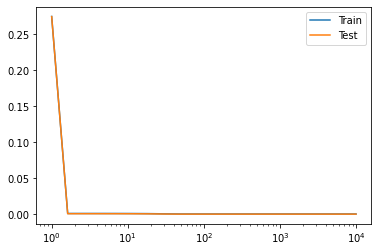

In [214]:
graph_grid_results_lasso(grid_search_lasso_t1, 'log')

Trial 2

In [208]:
alphas = np.logspace(-4, 0, 20)
grid_search_lasso_t2 = grid_search_lasso(alphas)

Best alpha: 0.0011288378916846883
Train Score:  0.6019597999258103
Test Score:  0.6182160536690362


[1.00000000e-04 1.62377674e-04 2.63665090e-04 4.28133240e-04
 6.95192796e-04 1.12883789e-03 1.83298071e-03 2.97635144e-03
 4.83293024e-03 7.84759970e-03 1.27427499e-02 2.06913808e-02
 3.35981829e-02 5.45559478e-02 8.85866790e-02 1.43844989e-01
 2.33572147e-01 3.79269019e-01 6.15848211e-01 1.00000000e+00]
       Train      Test
0   0.602269  0.599611
1   0.602269  0.599616
2   0.602267  0.599624
3   0.602263  0.599634
4   0.602252  0.599646
5   0.602222  0.599653
6   0.602145  0.599633
7   0.601940  0.599514
8   0.601401  0.599097
9   0.599980  0.597825
10  0.596234  0.594199
11  0.590967  0.589313
12  0.585419  0.583995
13  0.575767  0.575058
14  0.551377  0.550981
15  0.505247  0.504608
16  0.492766  0.491880
17  0.471541  0.471024
18  0.416856  0.416676
19  0.274279  0.274003


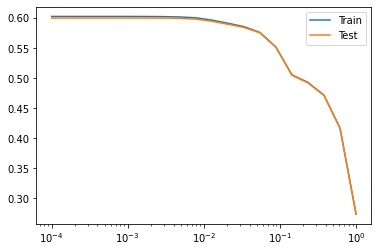

In [216]:
graph_grid_results_lasso(grid_search_lasso_t2, 'log')

In [217]:
alphas = np.linspace(0.0001, 0.002, 200)
grid_search_lasso_t3 = grid_search_lasso(alphas)

Best alpha: 0.0011216080402010051
Train Score:  0.6019603993506546
Test Score:  0.618216413549163


[0.0001     0.00010955 0.0001191  0.00012864 0.00013819 0.00014774
 0.00015729 0.00016683 0.00017638 0.00018593 0.00019548 0.00020503
 0.00021457 0.00022412 0.00023367 0.00024322 0.00025276 0.00026231
 0.00027186 0.00028141 0.00029095 0.0003005  0.00031005 0.0003196
 0.00032915 0.00033869 0.00034824 0.00035779 0.00036734 0.00037688
 0.00038643 0.00039598 0.00040553 0.00041508 0.00042462 0.00043417
 0.00044372 0.00045327 0.00046281 0.00047236 0.00048191 0.00049146
 0.00050101 0.00051055 0.0005201  0.00052965 0.0005392  0.00054874
 0.00055829 0.00056784 0.00057739 0.00058693 0.00059648 0.00060603
 0.00061558 0.00062513 0.00063467 0.00064422 0.00065377 0.00066332
 0.00067286 0.00068241 0.00069196 0.00070151 0.00071106 0.0007206
 0.00073015 0.0007397  0.00074925 0.00075879 0.00076834 0.00077789
 0.00078744 0.00079698 0.00080653 0.00081608 0.00082563 0.00083518
 0.00084472 0.00085427 0.00086382 0.00087337 0.00088291 0.00089246
 0.00090201 0.00091156 0.00092111 0.00093065 0.0009402  0.000949

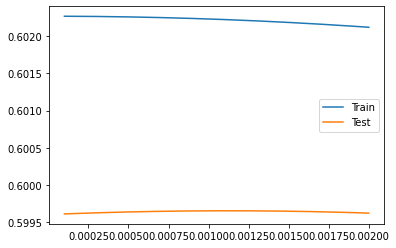

In [219]:
graph_grid_results_lasso(grid_search_lasso_t3, 'linear')

optimal lasso

In [228]:
optimal_lasso = Lasso(alpha=1)
optimal_lasso.fit(X_train, y_train)

print("Train Score: ", optimal_lasso.score(X_train, y_train))
print("Test Score: ", optimal_lasso.score(X_test, y_test))

Train Score:  0.27115135614505004
Test Score:  0.282192678497154


## Decision Tree regression

general functions

In [105]:
def grid_search_decision_tree(
        max_depths,
        min_samples_splits,
        min_samples_leafs=None
):
    decision_tree = DecisionTreeRegressor(random_state=38)
    hyperparameters = {
        'max_depth': max_depths,
        'min_samples_split': min_samples_splits,
    }
    include_additional_parameters(min_samples_leafs, hyperparameters)

    grid_search = GridSearchCV(
        decision_tree,
        hyperparameters,
        cv=4
    )
    grid_search.fit(X_train, y_train)

    print_grid_search_results(grid_search, hyperparameters)
    return grid_search


def include_additional_parameters(min_sample_leafs, parameters):
    if min_sample_leafs is not None:
        parameters.update({'min_samples_leaf': min_sample_leafs})


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train Score: ", grid_search.score(X_train, y_train))
    print("Test Score: ", grid_search.score(X_test, y_test))


def graph_grid_search_decision_tree(grid_search):
    plt.figure(figsize=(16, 16), dpi=80)
    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=('max_depth', 'min_samples_split'),
        # subset={
        #     'max_depth': [3, 5],
        #     'min_samples_split': [3, 5]
        # }
    )

    plt.title("Decision Tree")
    plt.xlabel("max_depth")
    plt.ylabel("min_samples_split")
    # plt.legend()
    plt.show()

Trial 1 max_depth and min_samples_splits

In [83]:
max_depths = np.logspace(0, 3, 20, dtype=int)
min_samples_splits = np.logspace(0, 3, 20, dtype=int)

grid_results_t1 = % time grid_search_decision_tree(max_depths, min_samples_splits)

Best max_depth: 12
Best min_samples_split: 54
Train Score:  0.830912599728454
Test Score:  0.72886409956847
CPU times: user 1min 10s, sys: 899 ms, total: 1min 11s
Wall time: 1min 11s


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=38),
             param_grid={'max_depth': array([   1,    1,    2,    2,    4,    6,    8,   12,   18,   26,   37,
         54,   78,  112,  162,  233,  335,  483,  695, 1000]),
                         'min_samples_split': array([   1,    1,    2,    2,    4,    6,    8,   12,   18,   26,   37,
         54,   78,  112,  162,  233,  335,  483,  695, 1000])})


ValueError: Your subset didn't match any data verify that the values are correct.

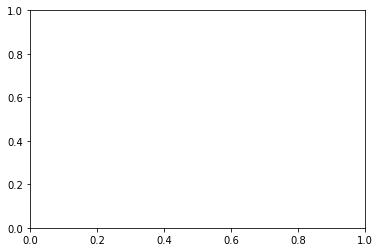

In [87]:
print(grid_results_t1)
graph_grid_search_decision_tree(grid_results_t1)


In [90]:
max_depths = np.linspace(0, 20, 20, dtype=int)
min_samples_splits = np.linspace(0, 100, 20, dtype=int)

grid_results_t2 = grid_search_decision_tree(max_depths, min_samples_splits)

Best max_depth: 14
Best min_samples_split: 57
Train Score:  0.837424971860635
Test Score:  0.730812768447448


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
156 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3

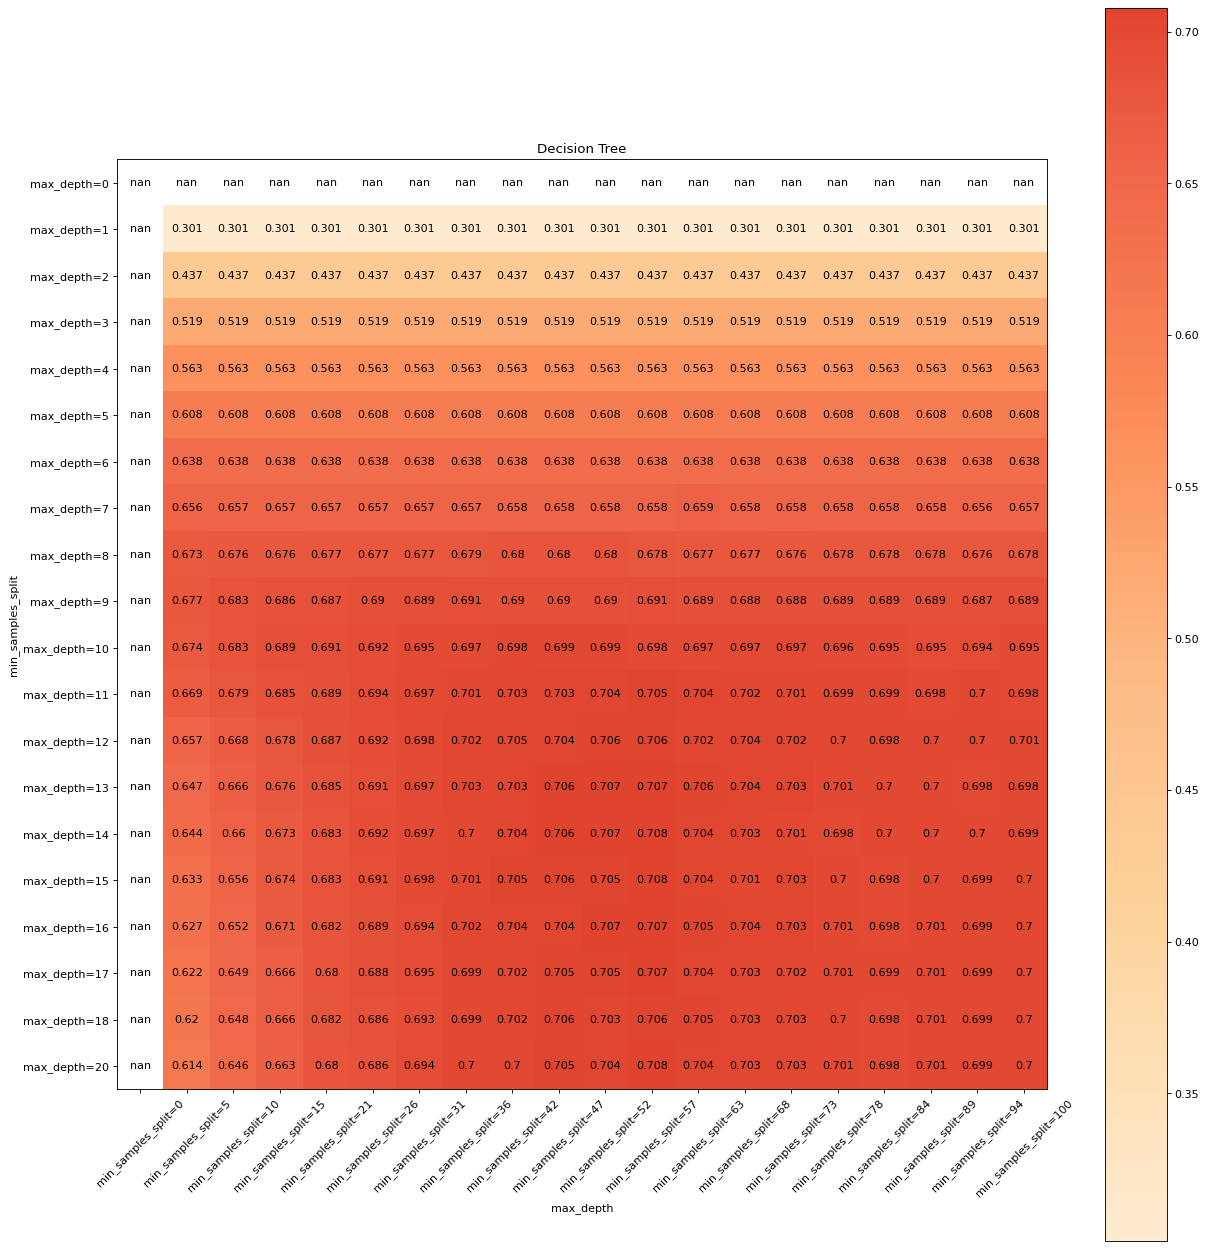

In [96]:
graph_grid_search_decision_tree(grid_results_t2)

In [98]:
max_depths = np.linspace(15, 25, 10, dtype=int)
min_samples_splits = np.linspace(30, 60, 10, dtype=int)

grid_results_t3 = grid_search_decision_tree(max_depths, min_samples_splits)

Best max_depth: 15
Best min_samples_split: 56
Train Score:  0.8399138109684053
Test Score:  0.726701825935105
Best max_depth: 15
Best min_samples_split: 56
Train Score:  0.8399138109684053
Test Score:  0.726701825935105


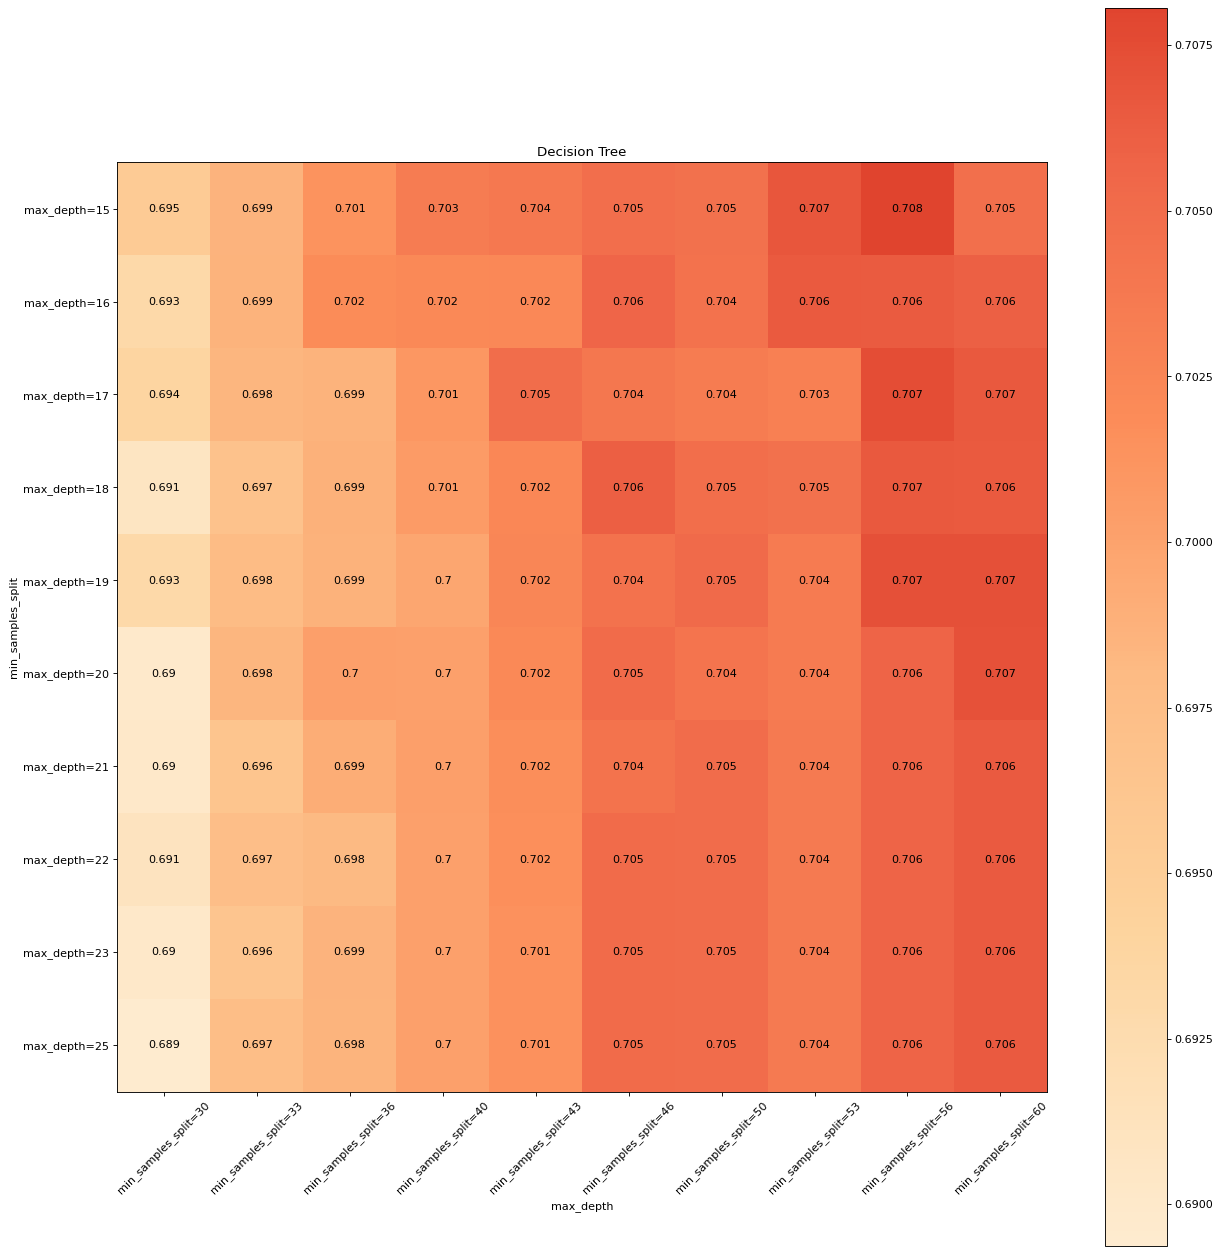

In [99]:
graph_grid_search_decision_tree(grid_results_t3)

trial with 3 variables

In [106]:
max_depths = np.linspace(10, 20, 5, dtype=int)
min_samples_splits = np.linspace(50, 60, 5, dtype=int)
min_samples_leafs = np.linspace(1, 10, 5, dtype=int)

grid_results_t4 = grid_search_decision_tree(
    max_depths,
    min_samples_splits,
    min_samples_leafs
)

Best max_depth: 20
Best min_samples_split: 50
Best min_samples_leaf: 7
Train Score:  0.8306329030562978
Test Score:  0.7469140942783101


trial 6

In [149]:
max_depths = np.linspace(10, 30, 10, dtype=int)
min_samples_splits = np.linspace(40, 60, 10, dtype=int)
min_samples_leafs = np.linspace(1, 20, 10, dtype=int)

grid_results_t6 = grid_search_decision_tree(
    max_depths,
    min_samples_splits,
    min_samples_leafs
)

Best max_depth: 16
Best min_samples_split: 48
Best min_samples_leaf: 11
Train Score:  0.8258905099049968
Test Score:  0.7489950012574695


plot all 3 vars

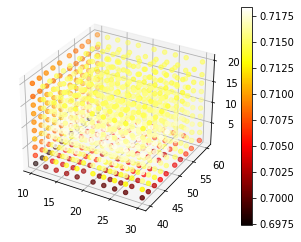

In [233]:
def plot_3d_heatmap(grid_results):
    result_params = grid_results.cv_results_['params']
    df = pd.DataFrame(result_params)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = df.loc[:, 'max_depth']
    y = df.loc[:, 'min_samples_split']
    z = df.loc[:, 'min_samples_leaf']
    c = grid_results.cv_results_['mean_test_score']
    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    fig.colorbar(img)
    plt.show()


plot_3d_heatmap(grid_results_t6)


In [256]:
max_depths = np.linspace(1, 60, 10, dtype=int)
min_samples_splits = np.linspace(1, 60, 10, dtype=int)
min_samples_leafs = np.linspace(1, 60, 10, dtype=int)

grid_results_t7 = grid_search_decision_tree(
    max_depths,
    min_samples_splits,
    min_samples_leafs
)

Best max_depth: 14
Best min_samples_split: 40
Best min_samples_leaf: 7
Train Score:  0.8407395868095088
Test Score:  0.7466586019050335


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python

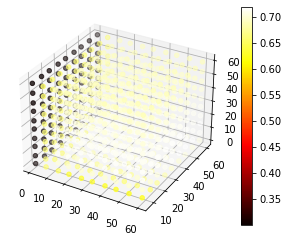

In [259]:
plot_3d_heatmap(grid_results_t7)

t2

In [260]:
max_depths = np.linspace(10, 30, 10, dtype=int)
min_samples_splits = np.linspace(30, 60, 10, dtype=int)
min_samples_leafs = np.linspace(5, 25, 10, dtype=int)

grid_results_t9 = grid_search_decision_tree(
    max_depths,
    min_samples_splits,
    min_samples_leafs
)

Best max_depth: 14
Best min_samples_split: 36
Best min_samples_leaf: 11
Train Score:  0.8373835785410036
Test Score:  0.748059247943206


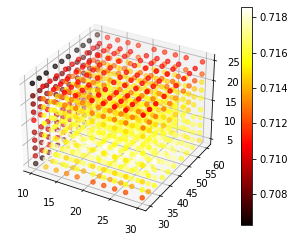

In [262]:
plot_3d_heatmap(grid_results_t9)

trial 3

In [263]:
max_depths = np.linspace(10, 18, 8, dtype=int)
min_samples_splits = np.linspace(32, 40, 8, dtype=int)
min_samples_leafs = np.linspace(7, 15, 8, dtype=int)

grid_results_t10 = grid_search_decision_tree(
    max_depths,
    min_samples_splits,
    min_samples_leafs
)

Best max_depth: 13
Best min_samples_split: 35
Best min_samples_leaf: 7
Train Score:  0.8429487311836561
Test Score:  0.7440721666626999


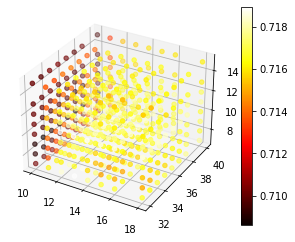

In [265]:
plot_3d_heatmap(grid_results_t10)

In [242]:
max_depths = np.linspace(8, 16, 8, dtype=int)
min_samples_splits = np.linspace(46, 54, 8, dtype=int)
min_samples_leafs = np.linspace(20, 28, 8, dtype=int)

grid_results_11 = grid_search_decision_tree(
    max_depths,
    min_samples_splits,
    min_samples_leafs
)

Best max_depth: 14
Best min_samples_split: 50
Best min_samples_leaf: 24
Train Score:  0.7816905934024789
Test Score:  0.6907149355893156


Optimal Decision Tree after training

In [165]:
optimal_decision_tree = DecisionTreeRegressor(
    max_depth=16,
    min_samples_split=48,
    min_samples_leaf=11,
    random_state=38
)
optimal_decision_tree.fit(X_train, y_train)

print("Train Score: ", optimal_decision_tree.score(X_train, y_train))
print("Test Score: ", optimal_decision_tree.score(X_test, y_test))

Train Score:  0.8258905099049968
Test Score:  0.7489950012574695


## Feature Importance

### Lasso feature importance

In [152]:
lasso_coefficients = optimal_lasso.coef_
print(lasso_coefficients)

[ 4.31998363e-01  9.79003172e-03 -1.02476905e-01  6.02311627e-01
 -5.15169219e-06 -3.86398615e-03 -4.19550004e-01 -4.34072655e-01]


In [156]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(random_state=38, cv=4)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alpha_)
print("Train Score: ", lasso_cv.score(X_train, y_train))
print("Test Score: ", lasso_cv.score(X_test, y_test))

optimal_lasso_from_cv = Lasso(alpha=lasso_cv.alpha_)
optimal_lasso_from_cv.fit(X_train, y_train)
print("Train Score: ", optimal_lasso_from_cv.score(X_train, y_train))
print("Test Score: ", optimal_lasso_from_cv.score(X_test, y_test))


0.03405628823803685
Train Score:  0.5848898329550937
Test Score:  0.6037879344089817
Train Score:  0.5848898329550937
Test Score:  0.6037879344089817


<AxesSubplot:>

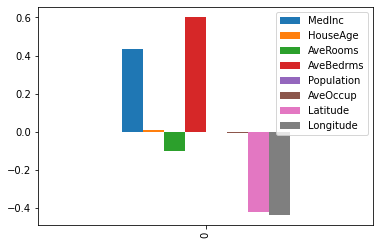

In [258]:
# fig, ax = plt.subplots()
# fig.set_figheight(4)
# fig.set_figwidth(4)
# plt.bar([x for x in range(len(lasso_coefficients))], lasso_coefficients)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.show()

lasso_importance_frame = pd.DataFrame(
    [lasso_coefficients],
)
lasso_importance_frame.transpose()
lasso_importance_frame.columns = cal_housing.feature_names
lasso_importance_frame.plot.bar()

### Decision tree fetaure importance

<AxesSubplot:>

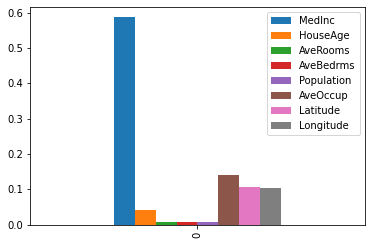

In [257]:
decision_tree_importances = optimal_decision_tree.feature_importances_

dt_importance_frame = pd.DataFrame(
    [decision_tree_importances],
)
dt_importance_frame.transpose()
dt_importance_frame.columns = cal_housing.feature_names
dt_importance_frame.plot.bar()

[0.58652162 0.0420855  0.00801665 0.00605854 0.00686195 0.14079851
 0.10606973 0.10358751]
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.586522  0.042086  0.008017   0.006059    0.006862  0.140799   0.10607   

   Longitude  
0   0.103588  


<AxesSubplot:>

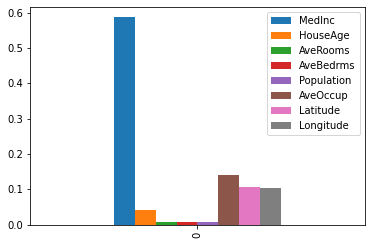

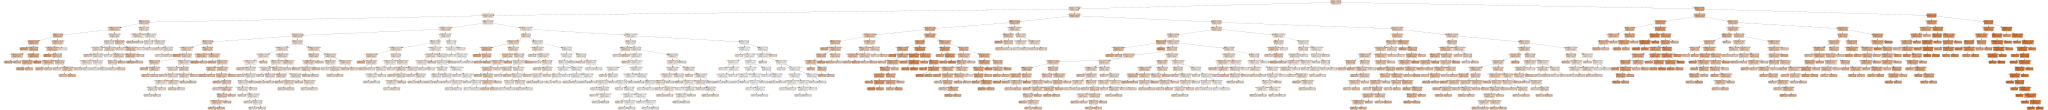

In [264]:
from IPython.core.display_functions import display
from sklearn.tree import export_graphviz

export_graphviz(
    optimal_decision_tree,
    out_file="tree.dot",
    feature_names=cal_housing.feature_names,
    impurity=False,
    filled=True
)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))